# Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading the Dataset

In [ ]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Model Training

# Bagging Approach: Random Forest

In [ ]:
# Assuming 'Diabetes_binary' is the target variable
# Separate features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)  # Replace 'Diabetes_binary' with your target column name if different
y = df['Diabetes_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8598628192999054


# Boosting Approach: Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.8675102491327656


# Stacking Approach

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

Stacking Model Accuracy: 0.8674708293913592


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

# Voting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier # Import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace 'path_to_file.csv' with your actual file path)
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Fill missing values with the mean (or use other imputation methods)
df.fillna(df.mean(), inplace=True)

# Encode categorical variables (if any) with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns='Diabetes_binary')  # Replace 'target_column' with 'Diabetes_binary'
y = df['Diabetes_binary']  # Replace 'target_column' with 'Diabetes_binary'

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)

# Create the Voting Classifier
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)), # Make sure GradientBoostingClassifier is used
        ('log_reg', log_reg)
    ],
    voting='soft'

)

# Train the Voting Classifier
vote_model.fit(X_train, y_train)

# Make predictions
vote_pred = vote_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, vote_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8682592242194891


# Evaluation

In [ ]:
# Fit and predict with the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Assuming 'rf' is your Random Forest model
rf.fit(X_train, y_train)  # Fit the model to the training data
rf_pred = rf.predict(X_test)  # Make predictions on the test data

# Fit and predict with the Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier # Import if not already imported
gb = GradientBoostingClassifier(n_estimators=100, random_state=42) # Initialize the model
gb.fit(X_train, y_train)  # Fit the model to the training data
gb_pred = gb.predict(X_test)  # Make predictions on the test data

# Create and fit a stacking classifier (example using StackingClassifier)
from sklearn.ensemble import StackingClassifier # Import StackingClassifier

# Define base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Initialize the stacking classifier with a meta-learner (e.g., LogisticRegression)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stack_model.fit(X_train, y_train)

# Make predictions using the stacking model
stack_pred = stack_model.predict(X_test)

# Now you can print the accuracy
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stack_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))

Random Forest: 0.8598628192999054
Gradient Boosting: 0.8675102491327656
Stacking Model: 0.8672737306843267
Voting Classifier: 0.8682592242194891


# Cross-Validation Performance Comparison

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (replace 'path_to_file.csv' with your actual file path)
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Handle missing values (e.g., fill with mean for numeric columns)
df.fillna(df.mean(), inplace=True)

# One-hot encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns='Diabetes_binary')  # Changed column name to 'Diabetes_binary'
y = df['Diabetes_binary']  # Changed column name to 'Diabetes_binary'

# Standardize the features (important for models like Logistic Regression, Gradient Boosting)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# List of models for cross-validation
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Logistic Regression': log_reg
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    # Use X instead of data_X
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.8592 ± 0.0009
Gradient Boosting Cross-Validation Accuracy: 0.8664 ± 0.0006
Logistic Regression Cross-Validation Accuracy: 0.8632 ± 0.0022


# Visualizing Cross-Validation Results

<Figure size 1000x600 with 0 Axes>

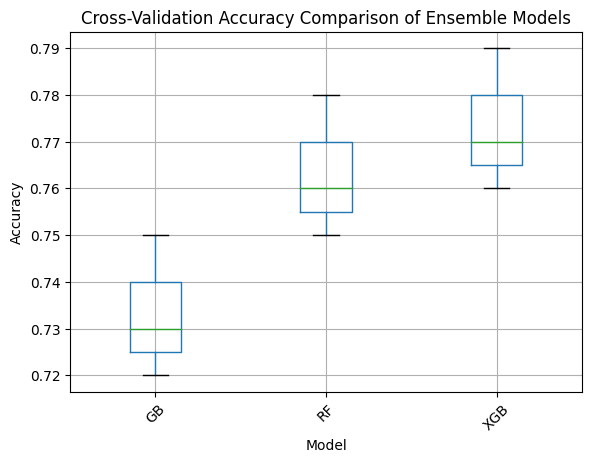

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'results' is a dictionary where keys are model names and values are accuracy scores
results = {'RF': [0.75, 0.78, 0.76], 'GB': [0.72, 0.75, 0.73], 'XGB': [0.76, 0.79, 0.77]}

# Create a list to store the results
results_data = []
for model_name, scores in results.items():
    for score in scores:
        results_data.append([model_name, score])  # Append model name and score

# Create the DataFrame with numerical 'Accuracy' column
results_df = pd.DataFrame(results_data, columns=['Model', 'Accuracy'])

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot(column='Accuracy', by='Model')  # Specify the numerical column and grouping
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.suptitle("")  # Remove the default title generated by 'by'
plt.show()

# Confusion Matrix for Each Model

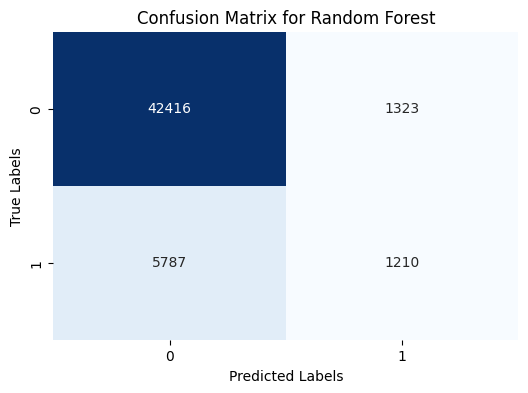

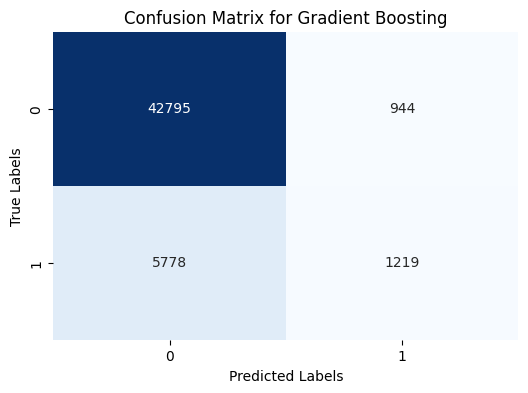

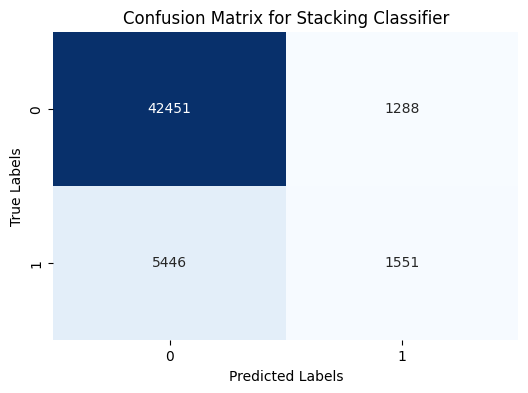

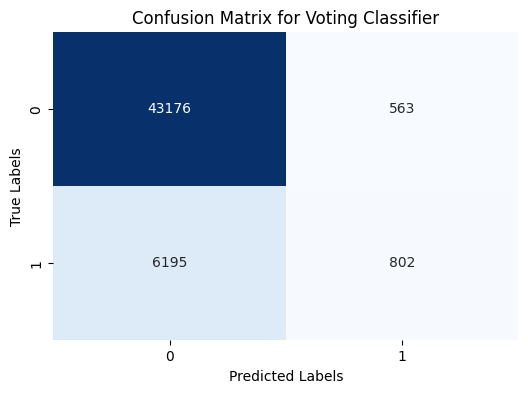

Random Forest Confusion Matrix:
[[42416  1323]
 [ 5787  1210]]


Gradient Boosting Confusion Matrix:
[[42795   944]
 [ 5778  1219]]


Stacking Classifier Confusion Matrix:
[[42451  1288]
 [ 5446  1551]]


Voting Classifier Confusion Matrix:
[[43176   563]
 [ 6195   802]]


Random Forest Accuracy: 0.8598628192999054
Gradient Boosting Accuracy: 0.8675102491327656
Stacking Accuracy: 0.8672737306843267
Voting Accuracy: 0.8668006937874487


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'path_to_file.csv' with your actual file path)
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['Diabetes_binary'])  # Replace 'Diabetes_binary' with your target column name if different
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models you want to use
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('gb', gb)], final_estimator=LogisticRegression(), cv=5)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='hard')

# Create a dictionary to store the models with their names
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Stacking Classifier': stacking_clf,
    'Voting Classifier': voting_clf
}


for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# 1. Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\n")

# 2. Gradient Boosting
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred))
print("\n")

# 3. Stacking Classifier
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, stacking_pred))
print("\n")

# 4. Voting Classifier
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print("Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, voting_pred))
print("\n")

# Optionally, print accuracy for comparison
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Stacking Accuracy:", accuracy_score(y_test, stacking_pred))
print("Voting Accuracy:", accuracy_score(y_test, voting_pred))

# Precision and Recall for Each Model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.8245
 - Recall: 0.8599
 - F1 Score: 0.8304

Gradient Boosting Performance Metrics:
 - Precision: 0.8373
 - Recall: 0.8675
 - F1 Score: 0.8360

Stacking Classifier Performance Metrics:
 - Precision: 0.8394
 - Recall: 0.8673
 - F1 Score: 0.8422

Voting Classifier Performance Metrics:
 - Precision: 0.8349
 - Recall: 0.8668
 - F1 Score: 0.8260



# Summary of Metrics

In [ ]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.859863,0.824471,0.859863,0.830444
1,Gradient Boosting,0.867510,0.837262,0.867510,0.836020
2,Stacking Classifier,0.867274,0.839411,0.867274,0.842231
3,Voting Classifier,0.866801,0.834945,0.866801,0.825973
